In [35]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [36]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [39]:
df.dropna(inplace=True)

In [40]:
df = df[['pclass','sex','age','survived' ]]

In [41]:
df['sex'] = df['sex'].map({'male':0,'female':1})

In [42]:
x= df[['pclass','sex','age']]
y= df[['survived']]

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [45]:
pred = clf.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc)

0.7297297297297297


In [46]:
pcclass = int(input("enter the pclass: "))
sex = int(input("enter the sex: "))
age = int(input("enter the age: "))
sex_num = 0 if sex =="male" else 1
prediction = clf.predict([[pcclass,sex_num , age]])
result = "Survived✅" if prediction == 1 else "Not Survived❌"
print("prediction:",result)

enter the pclass: 2
enter the sex: 0
enter the age: 18
prediction: Survived✅


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


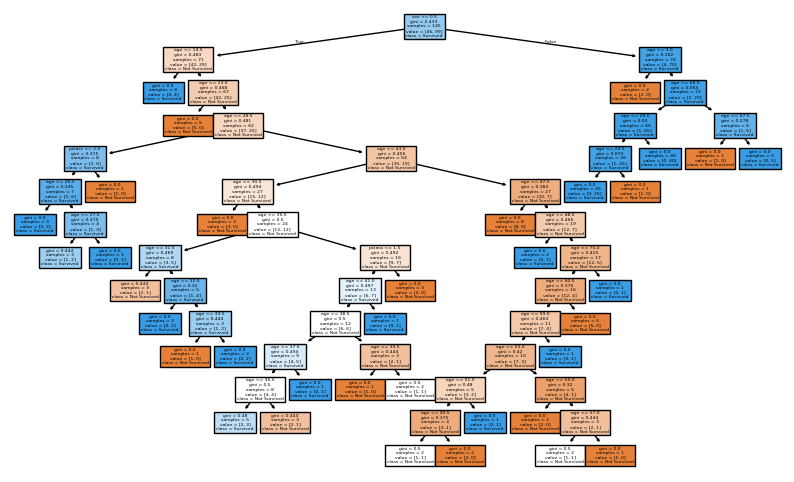

In [48]:
plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=x.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()
